<a href="https://colab.research.google.com/github/FGalvao77/Testes-estatisticos-que-voc-deve-fazer-para-uma-boa-Regressao-Linear/blob/main/Testes_estat%C3%ADsticos_que_voc%C3%AA_deve_fazer_para_uma_boa_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Testes estatísticos que você deve fazer para uma boa _Regressão Linear_**

---



_A regressão linear é muito mais do que executar código e avaliar R²._

**Resumo**

Iremos conhecer os diversos testes estatísticos que giram em torno de uma _Regressão Linear_.

São eles:
- Quais são as suposições necessárias para um modelo de regressão linear?
- Testando a normalidade dos resíduos
- Testando a variabilidade dos resíduos
- Verificando se há outliers nos resíduos
- Verificando a independência dos resíduos
- Analisando a multicolinearidade

Para essa atividade, usarei o conjunto de dados sobre **vinhos**.

Importaremos o _datastet_ com o seguinte comando:
```python 
from sklearn.datasets import load_wine
```

**Considerações iniciais**

Em primeiro lugar, sabemos que o conjunto de dados que será utilizado deve funcionar bem para regressões lineares, porém tudo isso é apenas para fins didático. 
A ideia principal é mostrar como cada teste é executado e como fica quando o modelo realmente passa no teste.

Em segundo lugar, na vida real nem sempre tudo é tão fácil. Para ser bem honesto com você, a maioria dos conjuntos de dados da vida real não passa nesses testes e você terá que trabalhar neles, transformar os dados, fazer engenharia de recursos, ajustar o modelo ou até mesmo escolher um algoritmo diferente para modelar seus dados. Esse é o emprego para o qual você se inscreveu - _Cientista de Dados_.

Por fim, mas não menos importante, há muitas suposições que devemos seguir ao realizar um modelo de regressão linear. Como Charles Wheelan diz em seu grande livro “Naked Statistics”:

_`"O LR é operacionalmente fácil de executar. Até uma criança pode fazer isso com o ótimo software disponível atualmente, mas para executá-lo corretamente e bem feito, isso é outra história."`_


**Regressão linear**

O método dos _Mínimos Quadrados Ordinários_ (OLS) é o mais comum para LR e, em suma, tenta traçar uma linha em algum lugar entre os pontos que nos dará o melhor ajuste, que nos dará o menor número quando somarmos a diferença entre os valores reais para a linha de regressão.

Essa diferença é o componente de erro da famosa equação $y = a + bx + e$. O método **OLS** elevará ao quadrado esses erros e somará os valores, tentando chegar ao número mínimo como resultado, o que resultará nos coeficientes para a equação de melhor ajuste.

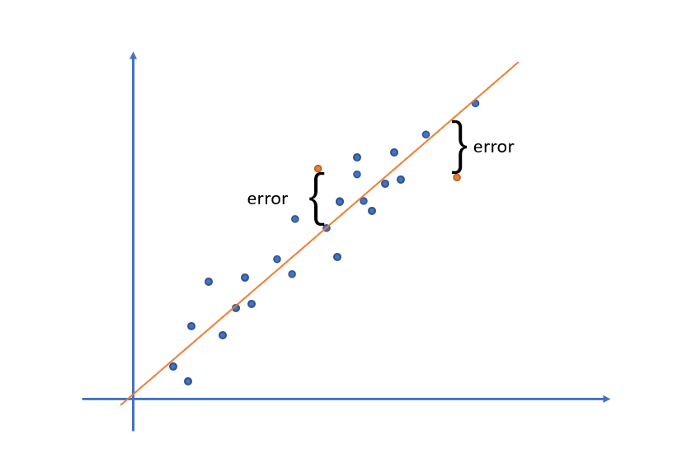

Sendo a parte errada da equação, tem muita importância. Em excelente artigo, os autores Dalson [FIGUEIREDO FILHO, Felipe NUNES, Enivaldo CARVALHO DA ROCHA, Manoel LEORNARDO SANTOS, Mariana BATISTA e José Alexandre SILVA JUNIOR na Revista Política Hoje, Vol.20, n. 1, 2001](https://periodicos.ufpe.br/revistas/politicahoje/article/download/3808/31622), descreve muitas das suposições onde devemos testar os resíduos de um LR e que iremos descrever e codificar neste artigo:

- Os resíduos devem seguir uma distribuição normal.
- Os resíduos são homogêneos, há homocedasticidade.
- Não há outliers nos erros.
- Não há autocorrelação nos erros.
- Não há multicolinearidade entre as variáveis ​​independentes.

**Os erros devem seguir uma distribuição normal**

Quando estamos criando um modelo LR, às vezes ouvimos que as variáveis ​​devem seguir uma distribuição normal. Isso não é bem verdade. O que deve seguir essa distribuição são os resíduos.

_`Os resíduos de um modelo LR devem seguir a Distribuição Normal para que os estimadores encontrados pelo método OLS não sejam enviesados ​​e sejam mais eficientes (FIGUEIREDO FILHO et all, 2011).`_

Então vamos começar com as análises.

In [39]:
# biblioteca para ignorar mensagens de alerta
import warnings
warnings.filterwarnings('ignore')

**Carregando o conjunto de dados**

In [40]:
# importando o conjunto de dados
# import sklearn.datasets
from sklearn.datasets import load_wine

In [41]:
# instanciando o conjunto de dados na variável "data_"
# data_ = sklearn.datasts.loadd_wine()
data_ = load_wine()

In [42]:
# visualizando o conjunto de dados
data_

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

> Perceba que, é um dicionário contendo os dados referente a vinho.

In [44]:
# visualizando o tipo do objeto
type(data_)

sklearn.utils.Bunch

In [45]:
# com a função ".DESCR" podemos visualizar o conjunto de dados de forma mais estruturada
print(data_.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [46]:
# biblioteca para modelagem/manipulação de dados
import pandas as pd

In [47]:
# formatando a exibição de 4 casas decimais após o ponto
pd.options.display.float_format = '{:,.4f}'.format

In [48]:
# instanciando o dicionário de dados em um dataframe
df = pd.DataFrame(
    data_.data,
    columns=data_.feature_names
)

df['target'] = data_.target

df.rename(columns={
    'od280/od315_of_diluted_wines': 'test_diluted_wines'
}, inplace=True)

In [49]:
# visualizando as 5 primeiras linhas
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,test_diluted_wines,proline,target
0,14.2300,1.7100,2.4300,15.6000,127.0000,2.8000,3.0600,0.2800,2.2900,5.6400,1.0400,3.9200,"1,065.0000",0
1,13.2000,1.7800,2.1400,11.2000,100.0000,2.6500,2.7600,0.2600,1.2800,4.3800,1.0500,3.4000,"1,050.0000",0
2,13.1600,2.3600,2.6700,18.6000,101.0000,2.8000,3.2400,0.3000,2.8100,5.6800,1.0300,3.1700,"1,185.0000",0
3,14.3700,1.9500,2.5000,16.8000,113.0000,3.8500,3.4900,0.2400,2.1800,7.8000,0.8600,3.4500,"1,480.0000",0
4,13.2400,2.5900,2.8700,21.0000,118.0000,2.8000,2.6900,0.3900,1.8200,4.3200,1.0400,2.9300,735.0000,0


In [50]:
# informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               178 non-null    float64
 1   malic_acid            178 non-null    float64
 2   ash                   178 non-null    float64
 3   alcalinity_of_ash     178 non-null    float64
 4   magnesium             178 non-null    float64
 5   total_phenols         178 non-null    float64
 6   flavanoids            178 non-null    float64
 7   nonflavanoid_phenols  178 non-null    float64
 8   proanthocyanins       178 non-null    float64
 9   color_intensity       178 non-null    float64
 10  hue                   178 non-null    float64
 11  test_diluted_wines    178 non-null    float64
 12  proline               178 non-null    float64
 13  target                178 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 19.6 KB


In [51]:
# há valores nulos?
df.isnull().sum()

alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
test_diluted_wines      0
proline                 0
target                  0
dtype: int64

In [52]:
# nome das colunas
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue', 'test_diluted_wines',
       'proline', 'target'],
      dtype='object')

In [53]:
formula = ''

for col in df.columns:
    formula = formula + ' + ' + col

print(formula)

 + alcohol + malic_acid + ash + alcalinity_of_ash + magnesium + total_phenols + flavanoids + nonflavanoid_phenols + proanthocyanins + color_intensity + hue + test_diluted_wines + proline + target


**Criando o modelo**

In [54]:
# importando a biblioteca para cálculos estatísticos
import statsmodels.formula.api as smf

In [55]:
# modelo de regressão
model = smf.ols('target ~ \
    alcohol + ash + alcalinity_of_ash + total_phenols + flavanoids + \
    nonflavanoid_phenols + color_intensity + hue + test_diluted_wines + proline', 
    data = df).fit()

In [56]:
# visualizando o sumário do modelo
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     147.6
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           1.81e-77
Time:                        16:19:00   Log-Likelihood:                -3.2069
No. Observations:                 178   AIC:                             28.41
Df Residuals:                     167   BIC:                             63.41
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.4742      0.478      7.269      0.000       2.531       4.418
alcohol                 -0.1093      0.036     -3.052      0.003      -0.180      -0.039
ash                     -0.1582      0.097     -1.635      0.104      -0.349       0.033
alcalinity_of_ash        0.0416      0.008      4.912      0.000       0.025       0.058
total_phenols            0.1487      0.063      2.352      0.020       0.024       0.273
flavanoids              -0.3642      0.048     -7.576      0.000      -0.459      -0.269
nonflavanoid_phenols    -0.2607      0.197     -1.326      0.187      -0.649       0.127
color_intensity          0.0747      0.014      5.327      0.000       0.047       0.102
hue                     -0.2281      0.122     -1.867      0.064      -0.469       0.013
test_diluted_wines      -0.2638      0.052     -5.091      0.000      -0.366      -0.161
proline                 -0.0007      0.000     -7.099      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.675   Durbin-Watson:                   1.521
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.795
Skew:                           0.130   Prob(JB):                        0.672
Kurtosis:                       2.801   Cond. No.                     2.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
# visualizando amostras aleatórias dos resíduos
model_resid = model.resid
model_resid.sample(15)  # 15 amostras

163    0.3983
17    -0.2314
145    0.3903
130    0.4895
167   -0.0501
5      0.1866
15    -0.1222
12    -0.0155
94    -0.1266
70    -0.2493
28    -0.0876
88    -0.0339
134    0.2149
6      0.2037
75    -0.2758
dtype: float64

**Teste de normalidade dos resíduos**

Para validar um modelo de regressão linear, suas variáveis ​​não precisam necessariamente ser distribuídas normalmente, mas os resíduos do modelo sim.

In [60]:
from statsmodels.tools.sm_exceptions import ValueWarning

In [61]:
from statsmodels.api import stats
# from statsmodels.stats.diagnostic import lilliefors

In [62]:
# Kolmogorov-Smirnov test
_, p = stats.lilliefors(model_resid, dist='norm')
print('Not normal | p-value:' if p < 0.05 else 'Normal | p-Value:', p)

Normal | p-Value: 0.2


In [63]:
import scipy.stats as scs

In [64]:
# Anderson
stat, p3, _ = scs.anderson(model_resid, dist='norm')
print('Anderson:')
print('Not normal | stat:' if stat > p3[2] else 'Normal | stat:', stat, ':: p-Value:', p3[2])

Anderson:
Normal | stat: 0.35916418199656164 :: p-Value: 0.77


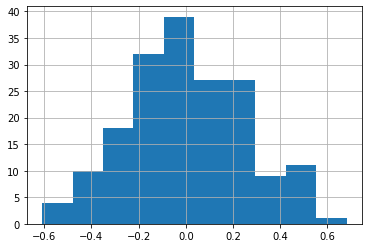

In [23]:
# distribuição dos resíduos
model.resid.hist();

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

Vamos traçar o gráfico **QQ** para visualizar onde os dados se desviam da distribuição normal, quando for o caso.

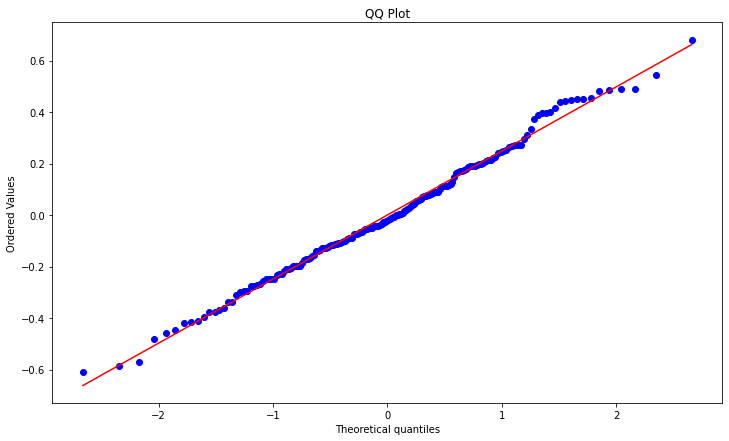

In [66]:
# QQPlot
plt.figure(figsize=(12, 7))
scs.probplot(model_resid, dist='norm', plot=plt)
plt.title('QQ Plot')
plt.show()

**Homocedasticidade**

Os resíduos devem ser homogêneos. E se pensarmos logicamente, isso faz muito sentido. Quer dizer, se estamos analisando dados para uma relação linear e quero mostrar que Y aumenta à medida que X e Z aumentam, então fica claro que os erros estarão dentro de um determinado intervalo. Os erros não devem estar muito longe da linha, caso contrário, não estamos falando de uma boa relação linear.



O teste Breusch-Pagan usa as seguintes hipóteses nulas e alternativas:

- hipótese nula (Ho): Homocedasticidade está presente.

- hipótese alternativa (Ha): Homocedasticidade não  está presente (ou seja, existe heterocedasticidade).

Podemos verificar numericamente e graficamente para confirmar.

In [67]:
# Ho = Homocedasticidade = P> 0,05 
# Ha = Não há homocedasticidade = p <= 0,05

import statsmodels.stats.api as sms
# from statsmodels.compat import lzip

# teste de homocedasticidade
stat, p, f, fp  = sms.het_breuschpagan(model_resid, model.model.exog)
print(f'Test stat: {stat}')
print(f'p-Value: {p}')
print(f'F-Value: {f}')
print(f'f_p_value: {fp}')

Test stat: 14.254047656267216
p-Value: 0.16171589669144282
F-Value: 1.45373117596194
f_p_value: 0.16108656286704198


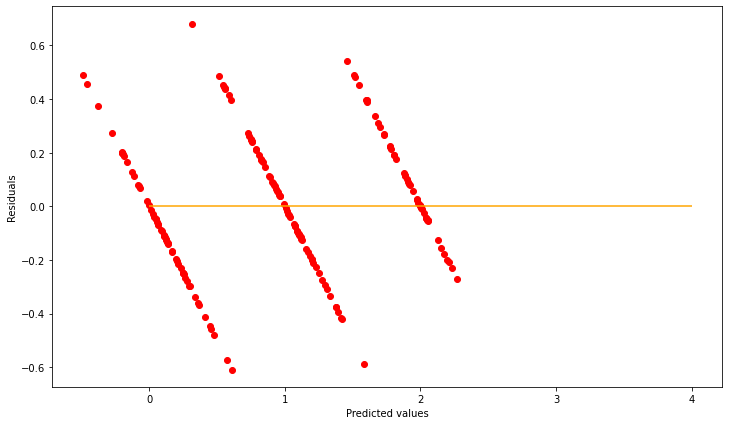

In [68]:
plt.figure(figsize=(12, 7))
plt.scatter(y=model_resid, x=model.predict(), 
            color='red')
plt.hlines(y=0, xmin=0, xmax=4, color='orange')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

**Teste de Outliers**

Junto com o último teste, outro bom teste é a presença de _outliers_ nos resíduos. Esse teste nos ajudará a determinar se há algum ponto onde nosso modelo não está sendo capaz de dar um resultado sensato. Isso confirma a qualidade do modelo. 

Recomenda-se que os números estejam entre -3 e 3 ou até -5 e 5.


In [69]:
# teste de outliers
outliers = model.outlier_test()

print(outliers.max())
print(outliers.min())

student_resid   3.2543
unadj_p         0.9995
bonf(p)         1.0000
dtype: float64
student_resid   -2.4602
unadj_p          0.0014
bonf(p)          0.2452
dtype: float64


**Independência de Residuais**

A independência dos resíduos significa que as observações também são independentes. Portanto, a medição de algo em um momento `t1` não influencia a medição em um momento `t2`.

Aqui, quanto mais próxima a estatística do teste estiver de 2, melhor. Isso significa que a correlação (r) é próxima de zero e, quando inserida nesta fórmula $2 x (1-r)$ , nos dará 2 como resultado.

In [70]:
from statsmodels.stats.stattools import durbin_watson

In [71]:
print(f'Test stat: {durbin_watson(model_resid)}')

Test stat: 1.5212847896408084


**Multicolinearidade**

A multicolinearidade pode bagunçar um modelo de regressão linear.

Quando está presente, há perda de informações para o modelo que calcula o _OLS_. Assim, quanto mais multicolinearidade, menos informações para o modelo.

_`"O problema da multicolinearidade é o aumento da magnitude da variância dos parâmetros estimados. Isso porque a presença de altos níveis de correlações entre as variáveis ​​independentes impossibilita estimar com precisão o efeito de cada variável sobre a variável dependente. (FIGUEIREDO FILHO et all, 2011)."`_

In [72]:
# verficando as correlações
vars_corr = df.drop('target', axis=1)
vars_corr.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,test_diluted_wines,proline
alcohol,1.0000,0.0944,0.2115,-0.3102,0.2708,0.2891,0.2368,-0.1559,0.1367,0.5464,-0.0717,0.0723,0.6437
malic_acid,0.0944,1.0000,0.1640,0.2885,-0.0546,-0.3352,-0.4110,0.2930,-0.2207,0.2490,-0.5613,-0.3687,-0.1920
ash,0.2115,0.1640,1.0000,0.4434,0.2866,0.1290,0.1151,0.1862,0.0097,0.2589,-0.0747,0.0039,0.2236
alcalinity_of_ash,-0.3102,0.2885,0.4434,1.0000,-0.0833,-0.3211,-0.3514,0.3619,-0.1973,0.0187,-0.2740,-0.2768,-0.4406
magnesium,0.2708,-0.0546,0.2866,-0.0833,1.0000,0.2144,0.1958,-0.2563,0.2364,0.2000,0.0554,0.0660,0.3934
total_phenols,0.2891,-0.3352,0.1290,-0.3211,0.2144,1.0000,0.8646,-0.4499,0.6124,-0.0551,0.4337,0.6999,0.4981
flavanoids,0.2368,-0.4110,0.1151,-0.3514,0.1958,0.8646,1.0000,-0.5379,0.6527,-0.1724,0.5435,0.7872,0.4942
nonflavanoid_phenols,-0.1559,0.2930,0.1862,0.3619,-0.2563,-0.4499,-0.5379,1.0000,-0.3658,0.1391,-0.2626,-0.5033,-0.3114
proanthocyanins,0.1367,-0.2207,0.0097,-0.1973,0.2364,0.6124,0.6527,-0.3658,1.0000,-0.0252,0.2955,0.5191,0.3304
color_intensity,0.5464,0.2490,0.2589,0.0187,0.2000,-0.0551,-0.1724,0.1391,-0.0252,1.0000,-0.5218,-0.4288,0.3161


Você também pode usar o Fator de inflação de variação, pois ele fornece um único número para examinar. Ele calcula a variância de uma determinada variável influenciada pelas outras. As regras práticas dizem que o número deve ser inferior a 10. Alguns dizem que é inferior a 7.

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [74]:
# teste de VIF
vif = add_constant(vars_corr)
pd.Series([variance_inflation_factor(vif.values, i)for i in range(vif.shape[1])], 
          index=vif.columns)

const                  680.4852
alcohol                  2.4604
malic_acid               1.6566
ash                      2.1854
alcalinity_of_ash        2.2387
magnesium                1.4179
total_phenols            4.3345
flavanoids               7.0293
nonflavanoid_phenols     1.7964
proanthocyanins          1.9757
color_intensity          3.0263
hue                      2.5514
test_diluted_wines       3.7855
proline                  2.8238
dtype: float64

**Análise de Modelo**

Depois que o modelo passou em todos esses testes, agora estamos em boa forma para avaliar seu resumo, `statsmodels`.

In [75]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     147.6
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           1.81e-77
Time:                        16:26:55   Log-Likelihood:                -3.2069
No. Observations:                 178   AIC:                             28.41
Df Residuals:                     167   BIC:                             63.41
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.4742 

Nosso modelo é bom. Devemos olhar para o **R-quadrado** para ver o quanto da relação a equação linear foi capaz de explicar. Foi `89%`. 

Se quisermos saber o quão bem essas variáveis ​​escolhidas realmente afetam a meta e explicam a variância, devemos olhar para **R2-ajustado**, geralmente também usado para comparar modelos junto com _AIC_ e _BIC_ (essas duas últimas métricas mencionadas, quanto menor, melhor) .

_Tanto o R2 quanto o R2 ajustado dão uma ideia de quantos pontos de dados estão dentro da linha da equação de regressão. No entanto, há uma diferença principal entre R2 e R2 ajustado: R2 assume que cada variável explica a variação na variável dependente. O R2 ajustado informa a porcentagem de variação explicada apenas pelas variáveis ​​independentes que realmente afetam a variável dependente._

Observe o _P> |t|_ coluna que é o valor p de cada variável. Isso explica a significância estatística disso para o modelo. O ideal é ter tudo abaixo do nível de significância de 0,05. Há alguns lá além desse limite.

Estamos perdendo 10% da variância devido a alguma coisa. Para melhorar este modelo, deve haver uma exploração de dados completa, engenharia de recursos, realizar transformações se necessário. Bem, muitas possibilidades.

In [76]:
df['predictions'] = model.fittedvalues
df.sample(12).T

,111,140,96,63,136,110,1,102,49,25,105,58
alcohol,12.5200,12.9300,11.8100,12.3700,12.2500,11.4600,13.2000,12.3400,13.9400,13.0500,12.4200,13.7200
malic_acid,2.4300,2.8100,2.1200,1.1300,4.7200,3.7400,1.7800,2.4500,1.7300,2.0500,2.5500,1.4300
ash,2.1700,2.7000,2.7400,2.1600,2.5400,1.8200,2.1400,2.4600,2.2700,3.2200,2.2700,2.5000
alcalinity_of_ash,21.0000,21.0000,21.5000,19.0000,21.0000,19.5000,11.2000,21.0000,17.4000,25.0000,22.0000,16.7000
magnesium,88.0000,96.0000,134.0000,87.0000,89.0000,107.0000,100.0000,98.0000,108.0000,124.0000,90.0000,108.0000
total_phenols,2.5500,1.5400,1.6000,3.5000,1.3800,3.1800,2.6500,2.5600,2.8800,2.6300,1.6800,3.4000
flavanoids,2.2700,0.5000,0.9900,3.1000,0.4700,2.5800,2.7600,2.1100,3.5400,2.6800,1.8400,3.6700
nonflavanoid_phenols,0.2600,0.5300,0.1400,0.1900,0.5300,0.2400,0.2600,0.3400,0.3200,0.4700,0.6600,0.1900
proanthocyanins,1.2200,0.7500,1.5600,1.8700,0.8000,3.5800,1.2800,1.3100,2.0800,1.9200,1.4200,2.0400
color_intensity,2.0000,4.6000,2.5000,4.4500,3.8500,2.9000,4.3800,2.8000,8.9000,3.5800,2.7000,6.8000


**Antes de você ir**

LR é uma ferramenta muito poderosa. Especialmente quando você sabe como criá-lo e testar suas suposições.

Lembre-se de sempre realizar esses testes. Eles não são rígidos. Eles devem ser flexíveis e dar uma boa orientação se o seu modelo é bom ou não.

**Referências:**
- [O que é um valor aceitável para VIF?](https://quantifyinghealth.com/vif-threshold/)
- [O que fazer e não fazer na LR.](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/LU5U7H)
- [A diferença entre R2 e R2 ajustado.](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/adjusted-r2/)